# dgrec

> Analysing DGRec data

## Install

```sh
pip install git+https://github.com/dbikard/dgrec.git
```

## How to use

### Command line interface

```sh
dgrec_genotypes fastq_path reference_path -o genotypes.csv
```

In [ ]:
!dgrec_genotypes --help

/home/dbikard/anaconda3/envs/DGRec/lib/python3.11/site-packages/Bio/__init__.py:138: BiopythonWarning: You may be importing Biopython from inside the source tree. This is bad practice and might lead to downstream issues. In particular, you might encounter ImportErrors due to missing compiled C extensions. We recommend that you try running your code from outside the source tree. If you are outside the source tree then you have a setup.py file in an unexpected directory: /home/dbikard/anaconda3/envs/DGRec/lib/python3.11/site-packages
  warnings.warn(
/home/dbikard/anaconda3/envs/DGRec/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(
Usage: dgrec_genotypes [OPTIONS] FASTQ REF

Options

### In python

In [ ]:
import dgrec

In [ ]:
#| hide
data_path = dgrec.get_example_data_dir()

In [ ]:
from Bio import SeqIO
import os

#Getting the path to the fastq file
fastq_file="sacB_example.fastq.gz"
fastq_path=os.path.join(data_path,fastq_file)

#Getting the reference sequence for the amplicon
read_ref_file="sacB_ref.fasta"
ref=next(SeqIO.parse(os.path.join(data_path,read_ref_file),"fasta"))
ref_seq=str(ref.seq)

#Generating a list of genotypes sorted by the number of UMIs that are read for each genotype
gen_list = dgrec.get_genotypes(fastq_path, ref_seq, ignore_pos=[0,1,2,138,139,140,141])

#Printing the top results
for g in gen_list[:20]:
    print(f"{g[1]}\t{g[0]}")

n reads:	1000
n_reads pass filter:	847
n_reads aligned:	824
Number of UMIs: 814

Number of genotypes: 123
675	
3	C56A
3	A76G
3	A91G
3	A91T
2	C69T
2	T122A
2	A91C
2	A105G
2	C116A
2	T60A
2	T59A
2	A68G
2	T134A
1	A61G,-63T,A76T,A91T
1	A79T,A91G
1	A61G,A72G,A76G,A79T
1	T108A,G127T,G132T
1	A48T,A86G
1	A61T,A68T,A72G,A79C,A91G


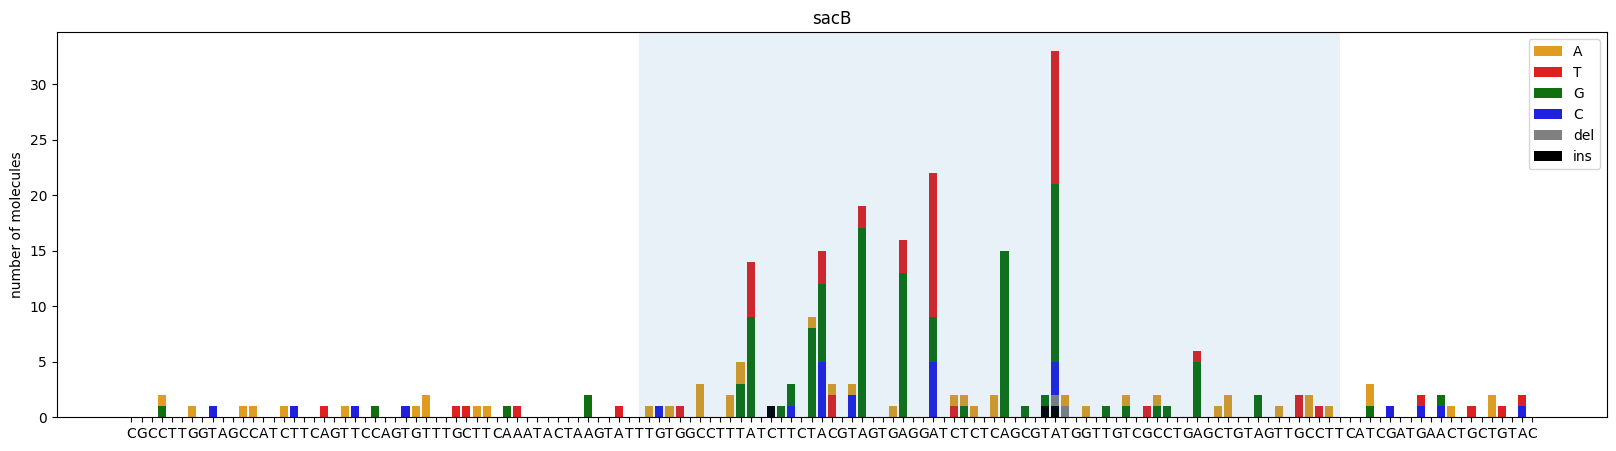

In [ ]:
fig = dgrec.plot_mutations(gen_list, ref_seq, sample_name="sacB", plot_range=[0,139], TR_range=[50,119])